In [3]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm

import utils
from data import get_data

sns.set_style('darkgrid')

In [4]:
for i in tqdm(range(10)):
    time.sleep(0.1)

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
df = pd.read_csv('results/performance_metrics.csv')

In [6]:
perf_metric_names, perf_metric_names_short, concepts_list, Q_matrix, df_logs, know_graph_edges_df, know_graph_adj = get_data(df)

  0%|          | 0/149 [00:00<?, ?it/s]

In [7]:
results_all = np.load('results/cdm_results.npy', allow_pickle=True)
results = results_all[()]['HierNCD'][5]

In [8]:
names = list(df['name'])
optimal_idx = names.index('OptimalClassifier')
pessimal_idx = names.index('PessimalClassifier')
gradboost_idx = names.index('LGBM(num_leaves=32, n=128), thr=0.5')
rf_idx = names.index('RF(max_depth=None, n=128), thr=0.5')
knn_idx = names.index('KNeighborsClassifier(k=3)')
nb_idx = names.index('BernoulliNB')
mlp_idx = names.index('MLPClassifier(sizes=(10, 10)), thr=0.5')
svm_idx = names.index('LinearSVC(C=8), thr=0.5')
random_idx = names.index('RandomClassifier')
minority_idx = names.index('MinorityClassifier')
majority_idx = names.index('MajorityClassifier')

In [9]:
mastery_subtable = pd.DataFrame(results['mastery'], columns=concepts_list, index=df['name']).iloc[[
    gradboost_idx,
    rf_idx,
    knn_idx,
    mlp_idx,
    svm_idx,
    nb_idx,
    optimal_idx,
    pessimal_idx,
    minority_idx,
    majority_idx,
    random_idx
]]
mastery_subtable

,C0,C1,BC,S0,S1,EQ,PR
name,,,,,,,
"LGBM(num_leaves=32, n=128), thr=0.5",0.450812,0.404729,0.567847,0.574974,0.594922,0.569954,0.550319
"RF(max_depth=None, n=128), thr=0.5",0.453270,0.384803,0.599349,0.572428,0.634046,0.583950,0.569948
KNeighborsClassifier(k=3),0.425063,0.460112,0.590953,0.569615,0.579674,0.582923,0.560174
"MLPClassifier(sizes=(10, 10)), thr=0.5",0.529979,0.326476,0.429776,0.552195,0.590136,0.539459,0.515580
"LinearSVC(C=8), thr=0.5",0.488553,0.327816,0.571213,0.573026,0.666796,0.595483,0.570685
BernoulliNB,0.442856,0.412814,0.592564,0.573499,0.629586,0.587704,0.568797
OptimalClassifier,0.927558,0.950912,0.922372,0.968981,0.983517,0.984350,0.955946
PessimalClassifier,0.105516,0.143893,0.354406,0.024929,0.078819,0.021121,0.091432
MinorityClassifier,0.113632,0.910200,0.614334,0.029943,0.450583,0.365349,0.405829


In [10]:
print(utils.generate_latex_table(mastery_subtable))

\begin{tabular}{|c|c|c|c|c|c|c|c|}\hline
       & C0 & C1 & BC & S0 & S1 & EQ & PR \\ \hline
    LGBM(num_leaves=32, n=128), thr=0.5    & 0.45 & 0.40 & 0.57 & 0.57 & 0.59 & 0.57 & 0.55 \\ \hline
    RF(max_depth=None, n=128), thr=0.5    & 0.45 & 0.38 & 0.60 & 0.57 & 0.63 & 0.58 & 0.57 \\ \hline
    KNeighborsClassifier(k=3)    & 0.43 & 0.46 & 0.59 & 0.57 & 0.58 & 0.58 & 0.56 \\ \hline
    MLPClassifier(sizes=(10, 10)), thr=0.5    & 0.53 & 0.33 & 0.43 & 0.55 & 0.59 & 0.54 & 0.52 \\ \hline
    LinearSVC(C=8), thr=0.5    & 0.49 & 0.33 & 0.57 & 0.57 & 0.67 & 0.60 & 0.57 \\ \hline
    BernoulliNB    & 0.44 & 0.41 & 0.59 & 0.57 & 0.63 & 0.59 & 0.57 \\ \hline
    OptimalClassifier    & 0.93 & 0.95 & 0.92 & 0.97 & 0.98 & 0.98 & 0.96 \\ \hline
    PessimalClassifier    & 0.11 & 0.14 & 0.35 & 0.02 & 0.08 & 0.02 & 0.09 \\ \hline
    MinorityClassifier    & 0.11 & 0.91 & 0.61 & 0.03 & 0.45 & 0.37 & 0.41 \\ \hline
    MajorityClassifier    & 0.90 & 0.17 & 0.59 & 0.54 & 0.08 & 0.38 & 0.44 \\ \hline


In [11]:
indices = []
for i in range(results['mastery'].shape[0]):
    if i != optimal_idx:
        if np.any(results['mastery'][i] < results['mastery'][pessimal_idx]):
           indices.append(i)

pessimal_table = pd.DataFrame(results['mastery'], columns=concepts_list, index=df['name']).iloc[[pessimal_idx] + indices]
pessimal_table['R0'] = df.set_index('name').iloc[[pessimal_idx] + indices]['recall0']
pessimal_table['BA'] = df.set_index('name').iloc[[pessimal_idx] + indices]['balanced_accuracy']
pessimal_table

,C0,C1,BC,S0,S1,EQ,PR,R0,BA
name,,,,,,,,,
PessimalClassifier,0.105516,0.143893,0.354406,0.024929,0.078819,0.021121,0.091432,0.000000,0.000000
"MLPClassifier(sizes=(1,)), thr=0.8",0.906941,0.148286,0.572231,0.530354,0.068643,0.378192,0.438994,1.000000,0.500000
"MLPClassifier(sizes=(100,)), thr=0.8",0.694744,0.281441,0.345455,0.553440,0.588591,0.508211,0.496578,0.973333,0.682500
"MLPClassifier(sizes=(200,)), thr=0.8",0.680296,0.262389,0.347251,0.559445,0.604332,0.516149,0.500098,0.973333,0.699167
"PolySVC(degree=4, gamma=0.001), thr=0.2",0.105393,0.904174,0.616571,0.029487,0.447511,0.367426,0.407640,0.000000,0.500000
"PolySVC(degree=4, gamma=0.1), thr=0.8",0.648547,0.297442,0.343323,0.555203,0.559474,0.505650,0.493779,0.960000,0.680000
"RBFSVM(C=8), thr=0.8",0.649032,0.284999,0.344243,0.553980,0.580826,0.506882,0.496858,0.966667,0.679167
"RF(max_depth=2, n=8), thr=0.8",0.862641,0.375028,0.330247,0.546703,0.445054,0.471331,0.465608,0.993333,0.605000
"RF(max_depth=2, n=32), thr=0.8",0.911882,0.372399,0.339914,0.544684,0.408287,0.454257,0.461282,1.000000,0.562500


In [12]:
print(utils.generate_latex_table(pessimal_table))

\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}\hline
       & C0 & C1 & BC & S0 & S1 & EQ & PR & R0 & BA \\ \hline
    PessimalClassifier    & 0.11 & 0.14 & 0.35 & 0.02 & 0.08 & 0.02 & 0.09 & 0.00 & 0.00 \\ \hline
    MLPClassifier(sizes=(1,)), thr=0.8    & 0.91 & 0.15 & 0.57 & 0.53 & 0.07 & 0.38 & 0.44 & 1.00 & 0.50 \\ \hline
    MLPClassifier(sizes=(100,)), thr=0.8    & 0.69 & 0.28 & 0.35 & 0.55 & 0.59 & 0.51 & 0.50 & 0.97 & 0.68 \\ \hline
    MLPClassifier(sizes=(200,)), thr=0.8    & 0.68 & 0.26 & 0.35 & 0.56 & 0.60 & 0.52 & 0.50 & 0.97 & 0.70 \\ \hline
    PolySVC(degree=4, gamma=0.001), thr=0.2    & 0.11 & 0.90 & 0.62 & 0.03 & 0.45 & 0.37 & 0.41 & 0.00 & 0.50 \\ \hline
    PolySVC(degree=4, gamma=0.1), thr=0.8    & 0.65 & 0.30 & 0.34 & 0.56 & 0.56 & 0.51 & 0.49 & 0.96 & 0.68 \\ \hline
    RBFSVM(C=8), thr=0.8    & 0.65 & 0.28 & 0.34 & 0.55 & 0.58 & 0.51 & 0.50 & 0.97 & 0.68 \\ \hline
    RF(max_depth=2, n=8), thr=0.8    & 0.86 & 0.38 & 0.33 & 0.55 & 0.45 & 0.47 & 0.47 & 0.99 & 0.60 \\ \hl

In [13]:
metrics_np = df.drop(columns=['name']).to_numpy()
pearson_corr_matrix = np.zeros((15, 7))
spearman_corr_matrix = np.zeros((15, 7))

for i in range(15):
    for j in range(7):
        pearson_corr_matrix[i, j] = scipy.stats.pearsonr(metrics_np[:, i], results['mastery'][:, j])[0]
        spearman_corr_matrix[i, j] = scipy.stats.spearmanr(metrics_np[:, i], results['mastery'][:, j])[0]
pearson_corr_matrix = pd.DataFrame(pearson_corr_matrix, columns=concepts_list, index=perf_metric_names_short)
spearman_corr_matrix = pd.DataFrame(spearman_corr_matrix, columns=concepts_list, index=perf_metric_names_short)
def formatter_corr_matrix(x, i, j):
    if Q_matrix[i, j]:
        return "\\textbf{" + x + "}"
    else:
        return x

print(utils.generate_latex_table(spearman_corr_matrix, formatter_corr_matrix))

\begin{tabular}{|c|c|c|c|c|c|c|c|}\hline
       & C0 & C1 & BC & S0 & S1 & EQ & PR \\ \hline
    ACC    & 0.35 & -0.35 & 0.58 & 0.94 & 0.90 & 0.99 & \textbf{0.99} \\ \hline
    PR0    & -0.65 & 0.70 & 0.27 & \textbf{-0.10} & -0.06 & 0.20 & 0.10 \\ \hline
    R0    & \textbf{0.99} & -0.89 & -0.13 & \textbf{0.56} & 0.53 & 0.30 & 0.38 \\ \hline
    PR1    & 0.79 & -0.70 & -0.20 & 0.71 & \textbf{0.76} & 0.52 & 0.56 \\ \hline
    R1    & -0.88 & \textbf{0.92} & 0.31 & -0.35 & \textbf{-0.30} & -0.07 & -0.16 \\ \hline
    BA    & 0.16 & -0.16 & \textbf{0.67} & 0.86 & 0.81 & \textbf{0.98} & 0.96 \\ \hline
    FS0    & 0.59 & -0.58 & 0.44 & \textbf{0.97} & 0.93 & 0.91 & 0.94 \\ \hline
    FS1    & -0.19 & 0.19 & 0.77 & 0.63 & \textbf{0.58} & 0.85 & 0.81 \\ \hline
    AVGFS    & 0.23 & -0.24 & 0.64 & 0.89 & 0.85 & \textbf{0.99} & 0.98 \\ \hline
    FM0    & 0.63 & -0.63 & 0.40 & \textbf{0.96} & 0.94 & 0.89 & 0.92 \\ \hline
    FM1    & -0.21 & 0.22 & 0.76 & 0.60 & \textbf{0.56} & 0.83 & 0.78 \\ 

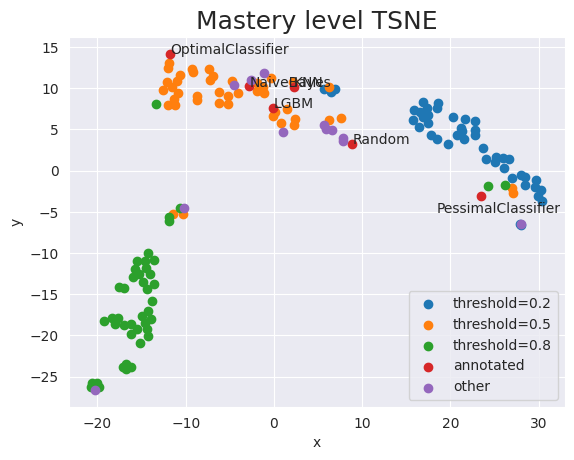

In [15]:
tsne_model = TSNE(n_components=2, perplexity=13, random_state=42)
mas_tsne = tsne_model.fit_transform(results['mastery'])

x = mas_tsne[:, 0]
y = mas_tsne[:, 1]

colors = ['#1f77b4'] * len(x)
labels = ['other'] * len(x)

for i in range(len(x)):
    if "thr=0.2" in names[i]:
        colors[i] = '#ff7f0e'
        labels[i] = 'threshold=0.2'
    if "thr=0.5" in names[i]:
        colors[i] = '#2ca02c'
        labels[i] = 'threshold=0.5'
    if "thr=0.8" in names[i]:
        colors[i] = '#d62728'
        labels[i] = 'threshold=0.8'

for idx in [optimal_idx, pessimal_idx, gradboost_idx, knn_idx, nb_idx, random_idx]:
    colors[idx] = 'red'
    labels[idx] = 'annotated'

for label in ['threshold=0.2', 'threshold=0.5', 'threshold=0.8', 'annotated', 'other']:
    mask = np.array(labels) == label
    plt.scatter(x[mask], y[mask], label=label)
    
plt.title('Mastery level TSNE', fontsize=18)
plt.xlabel('x')
plt.ylabel('y')


plt.annotate('OptimalClassifier', (x[optimal_idx], y[optimal_idx]))
plt.annotate('PessimalClassifier', (x[pessimal_idx] - 5, y[pessimal_idx] - 2), ha='left')
plt.annotate('LGBM', (x[gradboost_idx], y[gradboost_idx]))
plt.annotate('KNN', (x[knn_idx], y[knn_idx]))
plt.annotate('NaiveBayes', (x[nb_idx], y[nb_idx]))
plt.annotate('Random', (x[random_idx], y[random_idx]))

plt.legend()

plt.savefig('figures/masterytsne.svg', bbox_inches='tight')

plt.show()

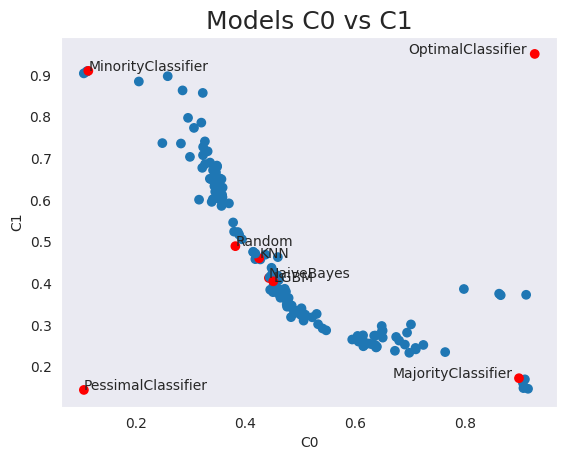

In [16]:
x = results['mastery'][:, concepts_list.index('C0')]
y = results['mastery'][:, concepts_list.index('C1')]

colors = ['#1f77b4'] * len(x)

colors[optimal_idx] = 'red'
colors[pessimal_idx] = 'red'
colors[gradboost_idx] = 'red'
colors[knn_idx] = 'red'
colors[nb_idx] = 'red'
colors[random_idx] = 'red'
colors[minority_idx] = 'red'
colors[majority_idx] = 'red'

plt.scatter(x, y, c=colors)
plt.title('Models C0 vs C1', fontsize=18)
plt.xlabel('C0')
plt.ylabel('C1')


plt.annotate('OptimalClassifier', (x[optimal_idx] - 0.23, y[optimal_idx]))
plt.annotate('PessimalClassifier', (x[pessimal_idx], y[pessimal_idx]))
plt.annotate('LGBM', (x[gradboost_idx], y[gradboost_idx]))
plt.annotate('KNN', (x[knn_idx], y[knn_idx]))
plt.annotate('NaiveBayes', (x[nb_idx], y[nb_idx]))
plt.annotate('Random', (x[random_idx], y[random_idx]))
plt.annotate('MinorityClassifier', (x[minority_idx], y[minority_idx]))
plt.annotate('MajorityClassifier', (x[majority_idx] - 0.23, y[majority_idx]))

plt.savefig('figures/masteryc0c1.svg', bbox_inches='tight')

plt.grid()
plt.show()

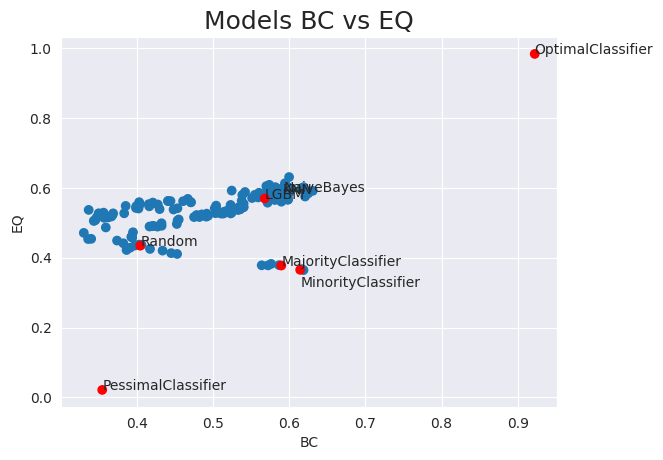

In [20]:
x = results['mastery'][:, concepts_list.index('BC')]
y = results['mastery'][:, concepts_list.index('EQ')]

colors = ['#1f77b4'] * len(x)

colors[optimal_idx] = 'red'
colors[pessimal_idx] = 'red'
colors[gradboost_idx] = 'red'
colors[knn_idx] = 'red'
colors[nb_idx] = 'red'
colors[random_idx] = 'red'
colors[minority_idx] = 'red'
colors[majority_idx] = 'red'

plt.scatter(x, y, c=colors)
plt.title('Models BC vs EQ', fontsize=18)
plt.xlabel('BC')
plt.ylabel('EQ')


plt.annotate('OptimalClassifier', (x[optimal_idx], y[optimal_idx]))
plt.annotate('PessimalClassifier', (x[pessimal_idx], y[pessimal_idx]))
plt.annotate('LGBM', (x[gradboost_idx], y[gradboost_idx]))
plt.annotate('KNN', (x[knn_idx], y[knn_idx]))
plt.annotate('NaiveBayes', (x[nb_idx], y[nb_idx]))
plt.annotate('Random', (x[random_idx], y[random_idx]))
plt.annotate('MinorityClassifier', (x[minority_idx], y[minority_idx] - 0.05))
plt.annotate('MajorityClassifier', (x[majority_idx], y[majority_idx]))


plt.savefig('figures/BCEQ.svg', bbox_inches='tight')
plt.show()

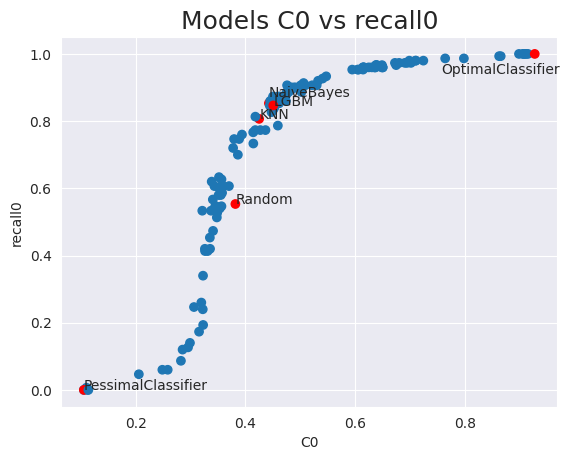

In [18]:
x = results['mastery'][:, concepts_list.index('C0')]
y = df['recall0']

colors = ['#1f77b4'] * len(x)

colors[optimal_idx] = 'red'
colors[pessimal_idx] = 'red'
colors[gradboost_idx] = 'red'
colors[knn_idx] = 'red'
colors[nb_idx] = 'red'
colors[random_idx] = 'red'

plt.scatter(x, y, c=colors)
plt.title('Models C0 vs recall0', fontsize=18)
plt.xlabel('C0')
plt.ylabel('recall0')


plt.annotate('OptimalClassifier', (x[optimal_idx] - 0.17, y[optimal_idx] - 0.06))
plt.annotate('PessimalClassifier', (x[pessimal_idx], y[pessimal_idx]))
plt.annotate('LGBM', (x[gradboost_idx], y[gradboost_idx]))
plt.annotate('KNN', (x[knn_idx], y[knn_idx]))
plt.annotate('NaiveBayes', (x[nb_idx], y[nb_idx] + 0.02))
plt.annotate('Random', (x[random_idx], y[random_idx]))

plt.savefig('figures/C0recall0.svg', bbox_inches='tight')
plt.show()

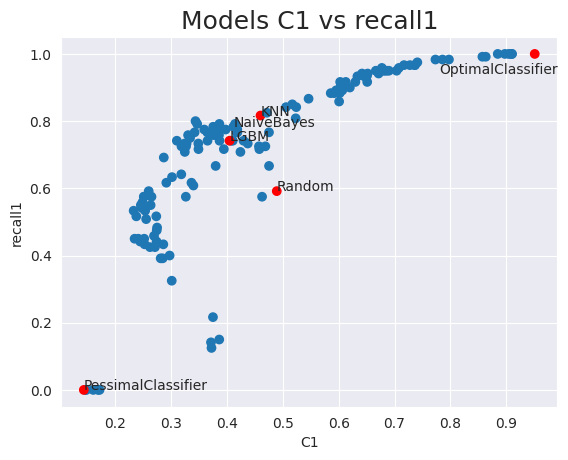

In [19]:
x = results['mastery'][:, concepts_list.index('C1')]
y = df['recall1']

colors = ['#1f77b4'] * len(x)

colors[optimal_idx] = 'red'
colors[pessimal_idx] = 'red'
colors[gradboost_idx] = 'red'
colors[knn_idx] = 'red'
colors[nb_idx] = 'red'
colors[random_idx] = 'red'

plt.scatter(x, y, c=colors)
plt.title('Models C1 vs recall1', fontsize=18)
plt.xlabel('C1')
plt.ylabel('recall1')


plt.annotate('OptimalClassifier', (x[optimal_idx] - 0.17, y[optimal_idx] - 0.06))
plt.annotate('PessimalClassifier', (x[pessimal_idx], y[pessimal_idx]))
plt.annotate('LGBM', (x[gradboost_idx], y[gradboost_idx]))
plt.annotate('KNN', (x[knn_idx], y[knn_idx]))
plt.annotate('NaiveBayes', (x[nb_idx], y[nb_idx]))
plt.annotate('Random', (x[random_idx], y[random_idx]))

plt.savefig('figures/C1recall1.svg', bbox_inches='tight')
plt.show()

In [21]:
df[((df['recall1'] < 0.25) & (df['recall1'] > 0.08))]

,name,accuracy,precision0,recall0,precision1,recall1,balanced_accuracy,f1_score0,f1_score1,average_f1_score,fowlkes_mallows0,fowlkes_mallows1,markedness,mcc,jaccard_index,cohens_kappa
20,"MLPClassifier(sizes=(10, 10)), thr=0.8",0.614815,0.592000,0.986667,0.900000,0.150000,0.568333,0.740000,0.257143,0.498571,0.764269,0.367423,0.746000,0.629653,0.443850,0.574545
108,"RF(max_depth=2, n=8), thr=0.8",0.648148,0.613169,0.993333,0.962963,0.216667,0.605000,0.758270,0.353741,0.556006,0.780436,0.456773,0.788066,0.673916,0.479452,0.613821
109,"RF(max_depth=2, n=32), thr=0.8",0.611111,0.588235,1.000000,1.000000,0.125000,0.562500,0.740741,0.222222,0.481481,0.766965,0.353553,0.794118,0.635582,0.440000,0.568493
110,"RF(max_depth=2, n=128), thr=0.8",0.614815,0.591270,0.993333,0.944444,0.141667,0.567500,0.741294,0.246377,0.493835,0.766373,0.365782,0.767857,0.634463,0.443850,0.573770


In [22]:
df[(df['recall1'] > 0.3) & (results['mastery'][:, 1] > 0.35) & (results['mastery'][:, 1] < 0.4)]

,name,accuracy,precision0,recall0,precision1,recall1,balanced_accuracy,f1_score0,f1_score1,average_f1_score,fowlkes_mallows0,fowlkes_mallows1,markedness,mcc,jaccard_index,cohens_kappa
2,DecisionTreeClassifier(max_depth=4),0.774074,0.763314,0.860000,0.792079,0.666667,0.763333,0.808777,0.723982,0.766380,0.810216,0.726672,0.777696,0.770420,0.631420,0.767570
13,"MLPClassifier(sizes=(100,)), thr=0.5",0.814815,0.808642,0.873333,0.824074,0.741667,0.807500,0.839744,0.780702,0.810223,0.840365,0.781785,0.816358,0.811898,0.687500,0.810606
14,"MLPClassifier(sizes=(200,)), thr=0.5",0.829630,0.829114,0.873333,0.830357,0.775000,0.824167,0.850649,0.801724,0.826187,0.850936,0.802201,0.829736,0.826939,0.708861,0.826342
26,KNeighborsClassifier(k=9),0.822222,0.826923,0.860000,0.815789,0.775000,0.817500,0.843137,0.794872,0.819005,0.843299,0.795133,0.821356,0.819422,0.698113,0.819095
56,"PolySVC(degree=2, gamma=0.1), thr=0.5",0.833333,0.830189,0.880000,0.837838,0.775000,0.827500,0.854369,0.805195,0.829782,0.854732,0.805807,0.834013,0.830741,0.714286,0.829975
62,"PolySVC(degree=4, gamma=0.1), thr=0.5",0.792593,0.790123,0.853333,0.796296,0.716667,0.785000,0.820513,0.754386,0.787449,0.821120,0.755433,0.793210,0.789076,0.656442,0.787879
80,"RBFSVM(C=1), thr=0.5",0.833333,0.834395,0.873333,0.831858,0.783333,0.828333,0.853420,0.806867,0.830144,0.853642,0.807231,0.833127,0.830721,0.714286,0.830260
81,"RBFSVM(C=2), thr=0.5",0.833333,0.838710,0.866667,0.826087,0.791667,0.829167,0.852459,0.808511,0.830485,0.852574,0.808694,0.832398,0.830779,0.714286,0.830544
104,"RF(max_depth=8, n=128), thr=0.5",0.822222,0.826923,0.860000,0.815789,0.775000,0.817500,0.843137,0.794872,0.819005,0.843299,0.795133,0.821356,0.819422,0.698113,0.819095
105,"RF(max_depth=None, n=8), thr=0.5",0.814815,0.808642,0.873333,0.824074,0.741667,0.807500,0.839744,0.780702,0.810223,0.840365,0.781785,0.816358,0.811898,0.687500,0.810606


In [23]:
from models import degree_of_agreement

In [24]:
strange_region_idx = ((df['recall1'] < 0.25) & (df['recall1'] > 0.08))
normal_region_idx = (df['recall1'] > 0.3) & (results['mastery'][:, 1] > 0.35) & (results['mastery'][:, 1] < 0.4)

In [25]:
mastery_sub = results['mastery'][strange_region_idx | normal_region_idx]
responses_sub = df[strange_region_idx | normal_region_idx].drop(columns=['name']).to_numpy()

In [37]:
DOA = degree_of_agreement(mastery_sub, responses_sub, Q_matrix)
print(DOA)
print(DOA[1])

[0.77777778 0.49673203 0.86928105 0.75653595 0.80228758 0.93333333
 0.85620915]
0.49673202614379086


In [38]:
DOA = degree_of_agreement(results['mastery'], df.drop(columns=['name']).to_numpy(), Q_matrix)
print(DOA)
print(DOA[1])

[0.95619445 0.87674587 0.7714493  0.76184322 0.6656917  0.94142935
 0.96290586]
0.8767458733901687


In [39]:
mastery_new = results['mastery'].copy()

In [40]:
mastery_new[strange_region_idx, 1] -= 0.2

In [41]:
mastery_sub_new = mastery_new[strange_region_idx | normal_region_idx]

In [42]:
DOA = degree_of_agreement(mastery_sub_new, responses_sub, Q_matrix)
print(DOA)
print(DOA[1])

[0.77777778 0.62091503 0.86928105 0.75653595 0.80228758 0.93333333
 0.85620915]
0.6209150326797386
